In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, plot_confusion_matrix

In [137]:
def summary_scores(model, train_set_x, test_set_x, train_set_y, test_set_y):
    print(f'Training Accuracy: {model.score(train_set_x, train_set_y)}')
    print(f'Testing Accuracy: {model.score(test_set_x, test_set_y)}')
    print(f'F1 Score: {f1_score(test_set_y, model.predict(test_set_x), average="weighted")}')
    print(f'Recall: {recall_score(test_set_y, model.predict(test_set_x), average="weighted")}')
    print(f'Precision: {precision_score(test_set_y, model.predict(test_set_x), average="weighted")}')


In [37]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv',encoding='latin1')
df.rename(columns = {'emotion_in_tweet_is_directed_at': 'Product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion', 'tweet_text': 'Tweet'}, inplace= True)
df.drop(9092, inplace=True)
df.reset_index(drop=True, inplace=True)
df['Text'] = df['Tweet'].str.lower()
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')
df['Text'] = df['Text'].str.split(' ')
df.dropna(subset=['Text'], inplace=True)
df['test'] = ''
df.fillna('na', inplace=True)
df.reset_index(drop=True, inplace=True)

In [38]:
apple_keywords = ['apple', '#apple', 'ipad', '#ipad', '#iphone', 'iphone', 'itunes', '#itunes', 'ios', 'airpods', '#ios', '#airpods'
                 'iphones', 'ipads', 'apples', 'quotapple', 'quotipad', 'ipadquot', 'quotipads', 'ipadsquot', 'applequot', 'quotiphone', 'iphonequot', 'quotios', 'iosquot', 'quotiphones', 'iphonesquot', 'ipad2']
google_keywords = ['google', '#google', 'android', '#android', 'googles', 'androids', 'quotgoogle', 'googlequot', 'quotandroid', 'androidquot', 'quotandroids', 'androidsquot' ]

for ind, val in enumerate(df['Text']):
    if df['Product'].values[ind] == 'na':
        for y in val:
            if y in apple_keywords:
                df['test'].values[ind] = y
            elif y in google_keywords:
                df['test'].values[ind] = y
                
    else:
        df['test'].values[ind] = df['Product'].values[ind]

In [39]:
df['test'] = df['test'].map(lambda x: x.lower())
df['test'] = df['test'].replace({'googles': 'google', 'apples': 'apple', 'androids': 'android','ipads': 'ipad', 'ipad2': 'ipad',
                                'quotgoogle': 'google', 'ipadquot': 'ipad', 'quotipad': 'ipad', 'androidquot': 'android', 'applequot': 'apple',
                               'googlequot': 'google', 'iphonequot': 'iphone', 'quotapple' : 'apple', 'iosquot': 'ios', 'quotiphone': 'iphone',
                                '#ipad' : 'ipad', '#google' : 'google', '#android': 'android', '#apple': 'apple', '#iphone': 'iphone'})
emotion_dict = {'No emotion toward brand or product' : 'Neutral emotion', "I can't tell": 'Neutral emotion', 'Positive emotion': 'Positive emotion',
               'Negative emotion': 'Negative emotion'}
df['Emotion'] = df['Emotion'].map(emotion_dict)


In [40]:
def company_search(test):
    if test == 'iphone':
        return 'apple'
    elif test == 'apple':
        return 'apple'
    elif test == 'ipad':
        return 'apple'
    elif test == 'ipad or iphone app':
        return 'apple'
    elif test == 'itunes':
        return 'apple'
    elif test == 'other apple product or service':
        return 'apple'
    elif test == 'ios':
        return 'apple'
    elif test == 'ipadquot':
        return 'apple'
    elif test == 'applequot':
        return 'apple'
    elif test == 'iphonequot':
        return 'apple'
    elif test == 'quotiphone':
        return 'apple'
    elif test == 'iosquot':
        return 'apple'
    elif test =='quotipad':
        return 'apple'
    elif test == 'quotapple':
        return 'apple'
    elif test =='google':
        return 'google'
    elif test == 'android':
        return 'google'
    elif test == 'other google product or service':
        return 'google'
    elif test == 'android app':
        return 'google'
    elif test == 'quotgoogle':
        return 'google'
    elif test == 'googlequot':
        return 'google'
    elif test == 'androidquot':
        return 'google'
    else:
        return 'unknown'
    
df['company'] = df['test'].apply(company_search)

In [41]:
target_dict = {'Negative emotion': 0, 'Neutral emotion': 1, 'Positive emotion': 2}
df['target'] = df['Emotion'].map(target_dict)

In [125]:
from collections import Counter
sw = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [126]:
common_words = ['sxsw', 'mention', 'link', 'ipad', 'iphone', 'google', 'apple', '2', 'android', 'rt']
sw2 = sw.extend(common_words)

In [44]:
pos_dict = {'Positive emotion': 1, 'Negative emotion': 0, 'Neutral emotion': 0}
neg_dict = {'Positive emotion': 0, 'Negative emotion': 1, 'Neutral emotion': 0}

In [45]:
df['pos'] = df['Emotion'].map(pos_dict)
df['neg'] = df['Emotion'].map(neg_dict)

In [ ]:
pipe = 

In [129]:
tfidf_vec = TfidfVectorizer(max_features=1000, ngram_range = (1,3), stop_words = sw)
X_tfv = tfidf_vec.fit_transform(df['Text'].str.join(' '))
X_tfv_df = pd.DataFrame(X_tfv.toarray())
X_tfv_df.columns = tfidf_vec.get_feature_names()

In [130]:
X_tfv_df_p = pd.concat([df['pos'], X_tfv_df], axis=1)
X_tfv_df_n = pd.concat([df['neg'], X_tfv_df], axis=1)

In [111]:
from sklearn.model_selection import train_test_split

In [131]:
X = X_tfv_df_n.drop(columns = ['neg'])
y = X_tfv_df_n.neg
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [132]:
y_train.value_counts()

0    6391
1     427
Name: neg, dtype: int64

In [114]:
from imblearn.over_sampling import SMOTE

In [133]:
smote = SMOTE(random_state=42)

In [134]:
X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [117]:
from sklearn.model_selection import cross_val_score

In [135]:
mnb_smote = MultinomialNB()
mnb_smote.fit(X_smote, y_smote)


MultinomialNB()

In [145]:
summary_scores(mnb_smote, X_smote, X_test, y_smote, y_test)

Training Accuracy: 0.8336723517446409
Testing Accuracy: 0.7672679278486582
F1 Score: 0.8235982860143447
Recall: 0.7672679278486582
Precision: 0.9156385497614807


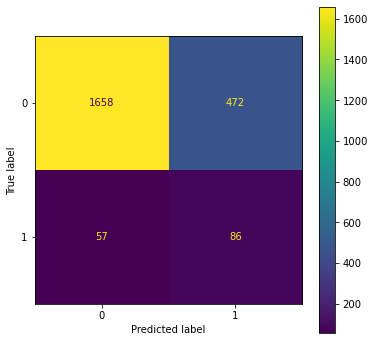

In [149]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(mnb_smote, X_test, y_test, ax=ax)

In [ ]:
summary_scores

In [136]:
y_hat_smote = mnb_smote.predict(X_smote)
confusion_matrix(y_smote, y_hat_smote)

array([[5079, 1312],
       [ 814, 5577]])

In [138]:
print(accuracy_score(y_smote, y_hat_smote))
print(recall_score(y_smote, y_hat_smote))

0.8336723517446409
0.8726333907056799


In [139]:
y_test_hat = mnb_smote.predict(X_test)

In [140]:
confusion_matrix(y_test, y_test_hat)

array([[1658,  472],
       [  57,   86]])

In [142]:
print(accuracy_score(y_test, y_test_hat))
print(recall_score(y_test, y_test_hat))
print(precision_score(y_test, y_test_hat))

0.7672679278486582
0.6013986013986014
0.15412186379928317


In [128]:
df

,Tweet,Product,Emotion,Text,test,company,target,pos,neg
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[wesley83, i, have, a, 3g, iphone, after, 3, h...",iphone,apple,0,0,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[jessedee, know, about, fludapp, , awesome, ip...",ipad or iphone app,apple,2,1,0
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[swonderlin, can, not, wait, for, ipad, 2, als...",ipad,apple,2,1,0
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[sxsw, i, hope, this, years, festival, isnt, a...",ipad or iphone app,apple,0,0,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[sxtxstate, great, stuff, on, fri, sxsw, maris...",google,google,2,1,0
...,...,...,...,...,...,...,...,...,...
9086,"@mention Yup, but I don't have a third app yet...",na,Neutral emotion,"[mention, yup, but, i, dont, have, a, third, a...",android,google,1,0,0
9087,Ipad everywhere. #SXSW {link},iPad,Positive emotion,"[ipad, everywhere, sxsw, link]",ipad,apple,2,1,0
9088,"Wave, buzz... RT @mention We interrupt your re...",na,Neutral emotion,"[wave, buzz, rt, mention, we, interrupt, your,...",google,google,1,0,0
9089,"Google's Zeiger, a physician never reported po...",na,Neutral emotion,"[googles, zeiger, a, physician, never, reporte...",google,google,1,0,0


In [143]:
from nltk.tokenize import TweetTokenizer

In [146]:
tweet_tokenizer = TweetTokenizer()